In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt

In [2]:
test_zad = pd.read_csv("Тестовое задание - tz_data.csv")

In [3]:
colors = []

In [4]:
test_zad_2 = test_zad.dropna(how='any')

In [5]:
test_zad_11 = dict(tuple(test_zad_2.groupby('cluster')))

In [6]:
vals = []

In [7]:
for v in test_zad_11.values():
  vals.append(v)

In [8]:
cluster_0 = vals[0].drop_duplicates(subset=['area'])
cluster_1 = vals[1].drop_duplicates(subset=['area'])
cluster_2 = vals[2].drop_duplicates(subset=['area'])
cluster_3 = vals[3].drop_duplicates(subset=['area'])

In [9]:
cluster_0_changed = dict(tuple(cluster_0.groupby('area')))
cluster_1_changed = dict(tuple(cluster_1.groupby('area')))
cluster_2_changed = dict(tuple(cluster_2.groupby('area')))
cluster_3_changed = dict(tuple(cluster_3.groupby('area')))

In [10]:
cols = ['blue',
        'red',
        'orange',
        'green']

In [11]:
updated_cluster_list = []

In [12]:
zero_colors = cols[0]
del cols[0]

for c in cluster_0_changed.values():
  colors_0 = []
  color = zero_colors
  for cc in c.values:
    colors_0.append(color)
  c['color'] = colors_0
  updated_cluster_list.append(c)

In [13]:
one_colors = cols[0]
del cols[0]

for c in cluster_1_changed.values():
  colors_1 = []
  color = one_colors
  for cc in c.values:
    colors_1.append(color)
  c['color'] = colors_1
  updated_cluster_list.append(c)

In [14]:
two_colors = cols[0]
del cols[0]

for c in cluster_2_changed.values():
  colors_2 = []
  color = two_colors
  for cc in c.values:
    colors_2.append(color)
  c['color'] = colors_2
  updated_cluster_list.append(c)

In [15]:
three_colors = cols[0]
del cols[0]

for c in cluster_3_changed.values():
  colors_3 = []
  color = three_colors
  for cc in c.values:
    colors_3.append(color)
  c['color'] = colors_3
  updated_cluster_list.append(c)

In [16]:
final_dataframe = pd.concat(updated_cluster_list)

In [17]:
final_dataframe = final_dataframe.sort_values(by=['area',
                                                  'cluster',
                                                  'cluster_name',
                                                  'count'],ascending=[True,
                                                                      True,
                                                                      True,
                                                                      False])

In [18]:
final_dataframe = final_dataframe.drop(['good (1)'], axis = 1)

In [19]:
final_dataframe.to_csv('table.csv', index=False, sep=',', encoding='utf-8-sig')

In [21]:
new_keywords = []

for f in final_dataframe['keyword']:
  if len(f) > 15:
    f = re.sub(' ', '\n ', f)
  new_keywords.append(f)

In [22]:
final_dataframe['keyword'] = new_keywords

In [23]:
plot_areas = dict(tuple(final_dataframe.groupby('area')))

In [24]:
plot_areas_f = pd.concat(plot_areas,ignore_index = True)

In [25]:
plot_areas_f = plot_areas_f.reset_index() # колонка "index" добавляется для построения графика по отдельным областям

In [26]:
test_zad_for_plot = dict(tuple(plot_areas_f.groupby('area')))

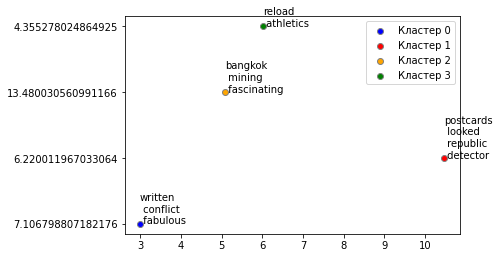

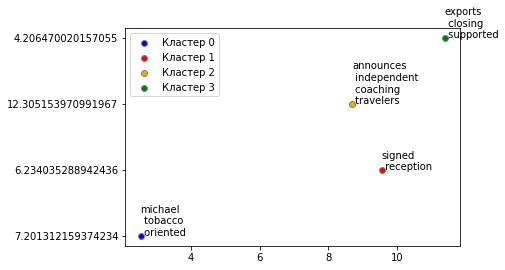

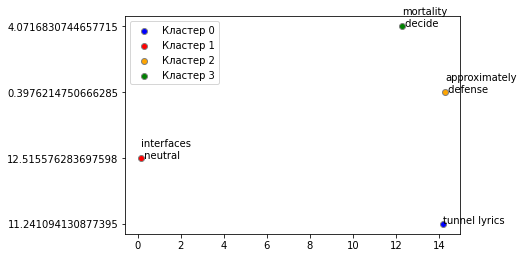

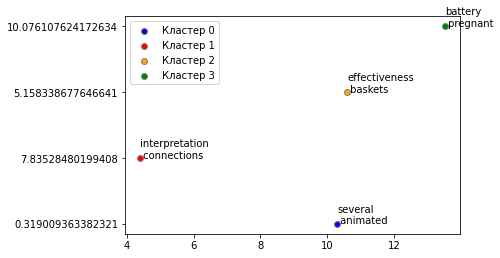

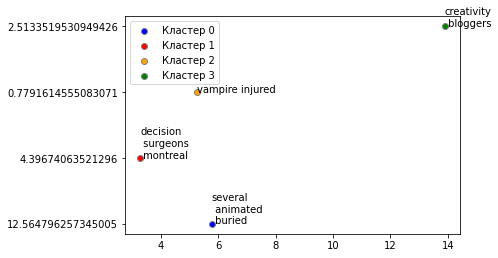

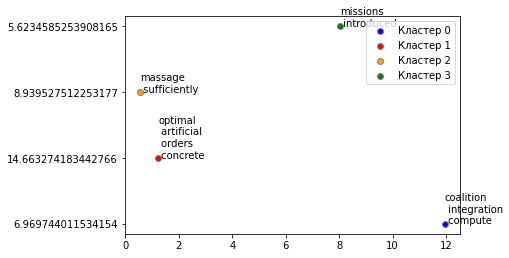

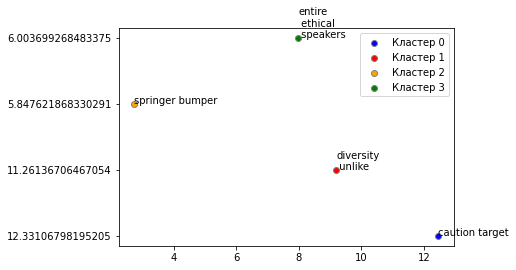

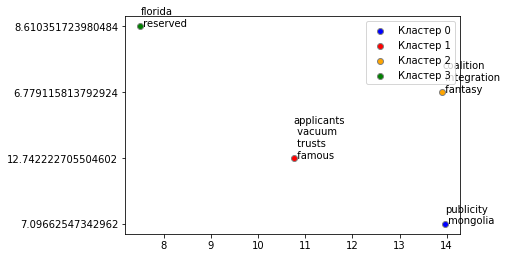

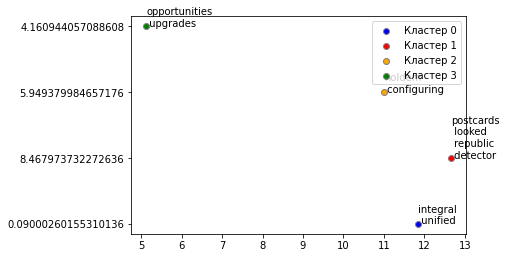

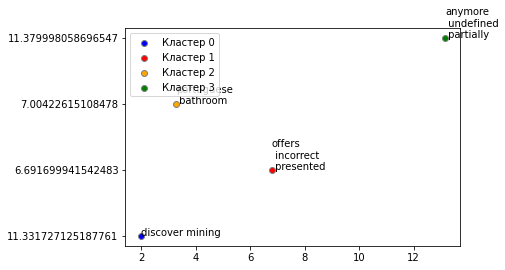

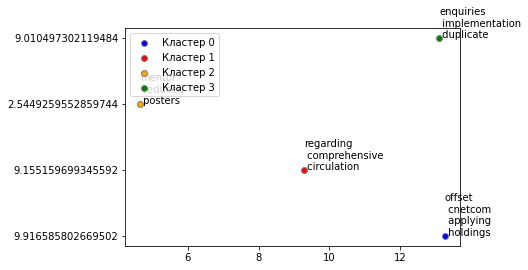

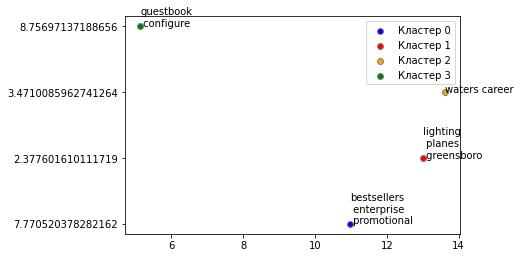

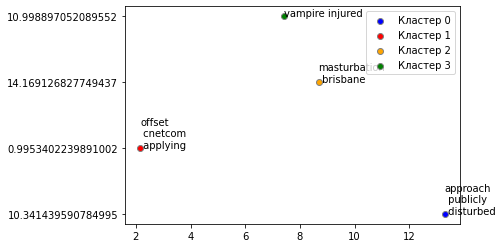

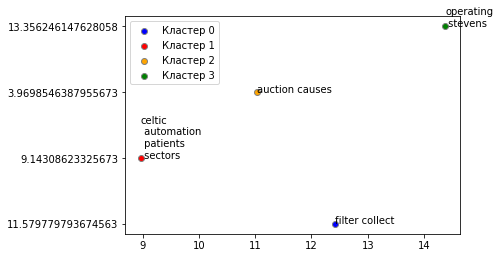

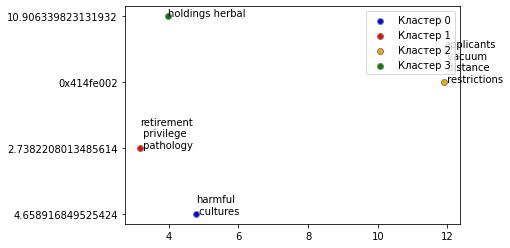

In [27]:
for t in test_zad_for_plot.values():
  x = t.x
  y = t.y
  c = t.color
  for i, txt in enumerate(t.cluster_name):
    plt.scatter(list(x)[i],list(y)[i],c=list(c)[i],label=txt,edgecolors='gray')
  for i, text in zip(t.index, t.keyword):
    plt.annotate(text, (x[i], y[i]))
  plt.legend(loc='best')
  plt.show()

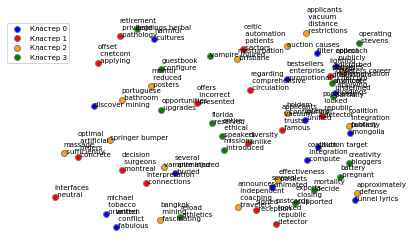

In [28]:
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')

x = plot_areas_f.x
y = plot_areas_f.y
c = plot_areas_f.color

plt.rc('font', size=7)
plt.rc('axes', titlesize=10)
for i, txt in enumerate(plot_areas_f.cluster_name):
    ax.scatter(list(x)[i],list(y)[i],c=c[i],label=txt,edgecolors='gray')
for i, text in zip(plot_areas_f.index, plot_areas_f.keyword):
  ax.annotate(text, (x[i], y[i]))
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best', bbox_to_anchor=(0.1, 1))


In [29]:
ax.figure.savefig("test.svg")